This notebook is to examine the change in the read depths of true positive (TP) calls of deletions (DEL) after adjusting the regions used to get the read depths (BAM_DP) for DEL. We want to determine if the adjusted BAM_DP for DEL is in the same range as BAM_DP for insertions (INS). Instead of taking the BAM_DP from the DEL region, I use the BAM_DP from 5-bp regions flanking the DEL, as discussed in [Issue #55](https://gitlab.labmed.uw.edu/molmicro/mtb_amr/-/issues/55)

*Dataset analyzed*
- **H37Rv10-3IND1**: DEL (2116) + INS (2201). INS includes DUP (1119) + RDM (524) + INV (558)

*Plot descriptions*
- Each figure represents data for each variant caller: bcftools, DeepVariant, DiscoSNP, FreeBayes, GATK, Lancet, and VarDict.
    - Top row: original BAM_DP
    - Bottom row: BAM_DP for DELs from 5-bp flanking regions.
    - Left: DEL called
    - Middle: INS called
    - Right: SNP called
    - Orange: True Positive
    - Blue: NOT True Positive


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
h37rvind1_orig = pd.read_csv('/Users/yeemayseah/Documents/Repos/mtb_amr/output/checked/H37Rv10-3IND1_alltools_normalized_dp0_DELBAMDP0_checked.csv')
h37rvind1_delbamdp5 = pd.read_csv('/Users/yeemayseah/Documents/Repos/mtb_amr/output/checked/H37Rv10-3IND1_alltools_normalized_dp0_DELBAMDP5_checked.csv')

In [33]:
h37rvind1_delbamdp5['SAMPLE'] = 'H37Rv10-3IND1_DEL_Adjusted'

In [34]:
h37rvind1 = pd.concat([h37rvind1_orig, h37rvind1_delbamdp5], ignore_index=True)

#### bcftools

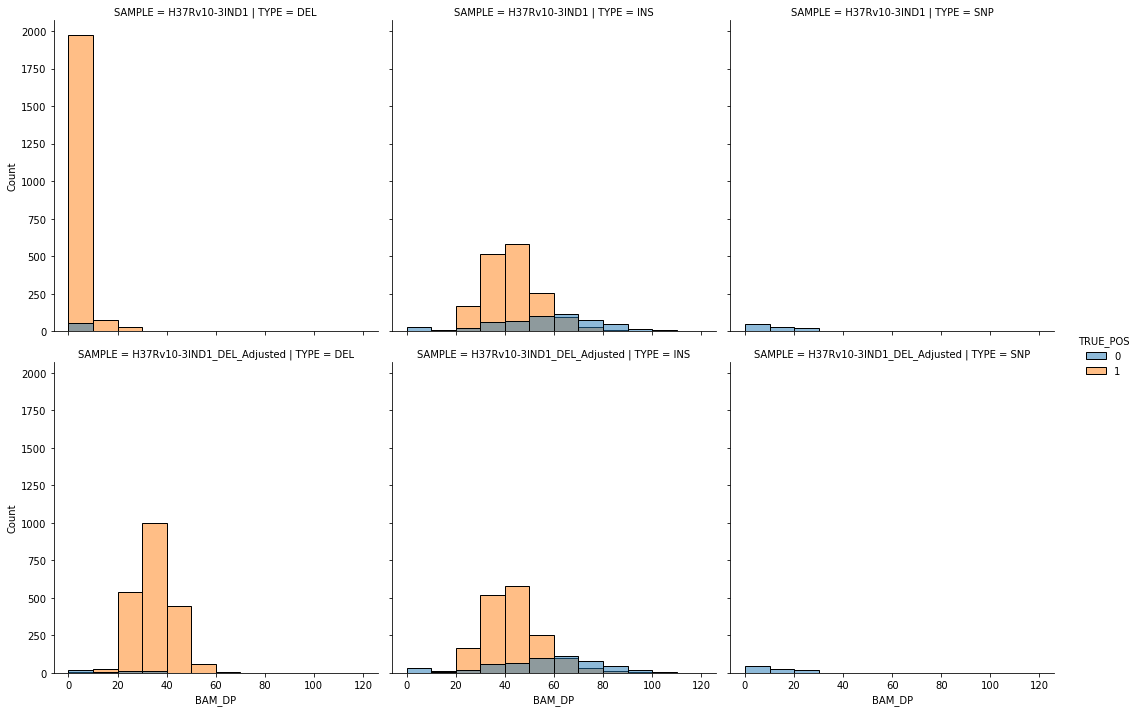

In [35]:
%matplotlib inline
sns.displot(h37rvind1[h37rvind1['TOOL'] == 'bcftools'], col='TYPE', row='SAMPLE',
            x='BAM_DP', binwidth=10, hue='TRUE_POS')

#### DeepVariant

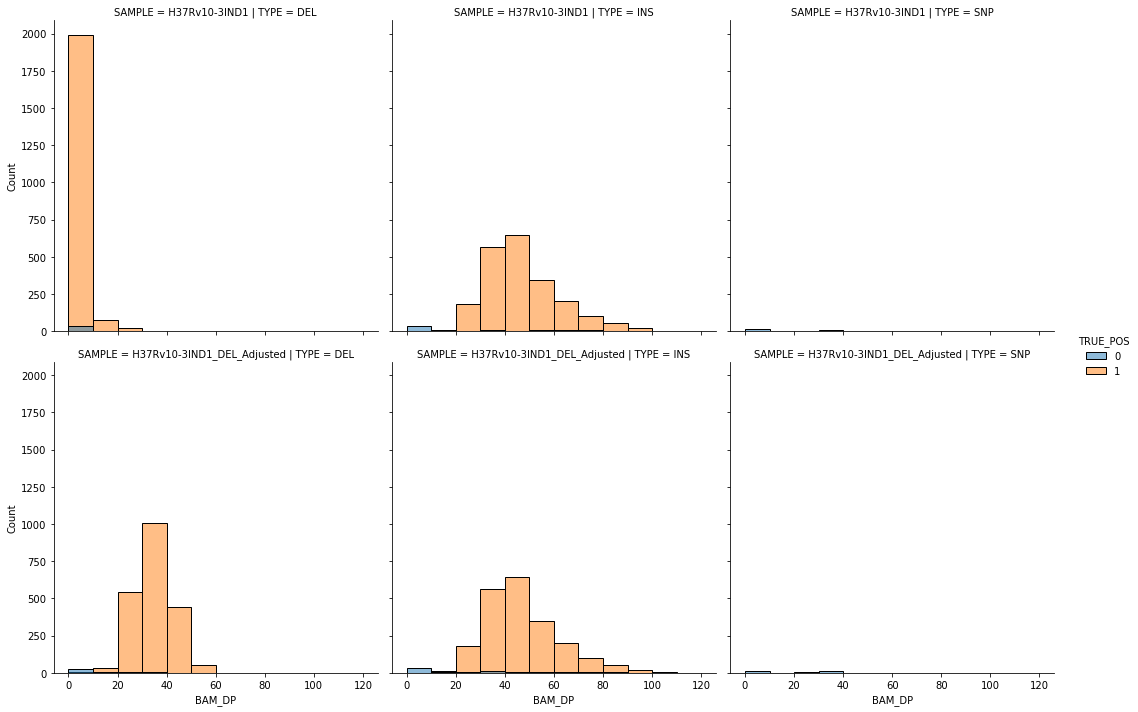

In [39]:
sns.displot(h37rvind1[h37rvind1['TOOL'] == 'deepvariant'], col='TYPE', row='SAMPLE',
            x='BAM_DP', binwidth=10, hue='TRUE_POS')

#### DiscoSNP

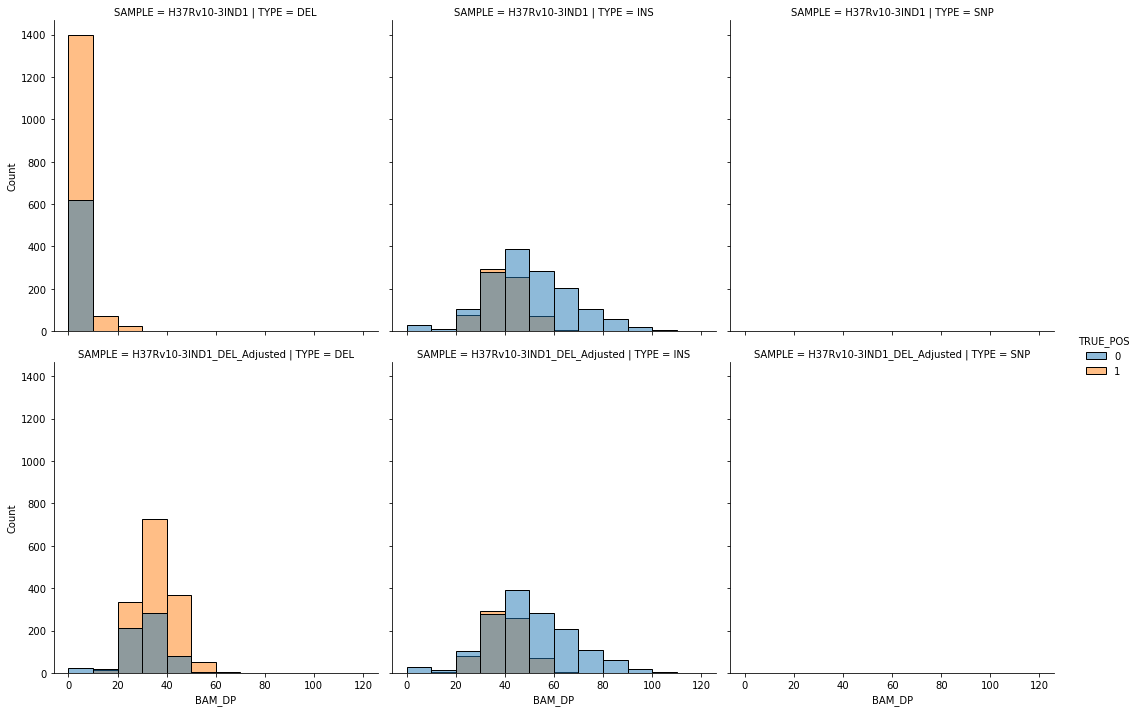

In [38]:
sns.displot(h37rvind1[h37rvind1['TOOL'] == 'discosnp'], col='TYPE', row='SAMPLE',
            x='BAM_DP', binwidth=10, hue='TRUE_POS')

#### FreeBayes

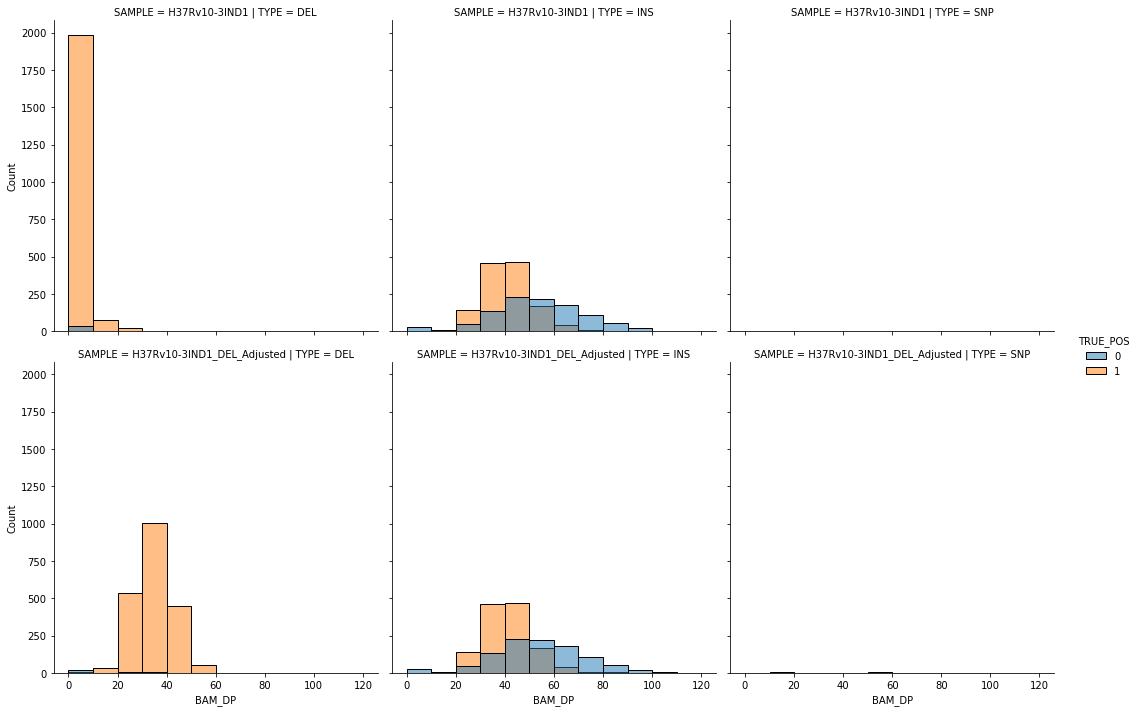

In [37]:
sns.displot(h37rvind1[h37rvind1['TOOL'] == 'freebayes'], col='TYPE', row='SAMPLE',
            x='BAM_DP', binwidth=10, hue='TRUE_POS')

#### GATK

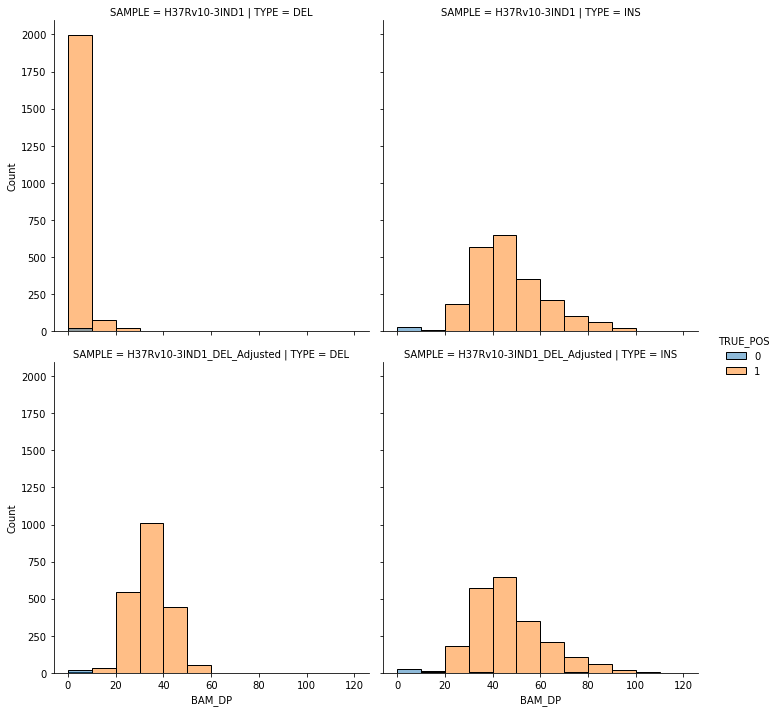

In [36]:
sns.displot(h37rvind1[h37rvind1['TOOL'] == 'gatk'], col='TYPE', row='SAMPLE',
            x='BAM_DP', binwidth=10, hue='TRUE_POS')

#### Lancet

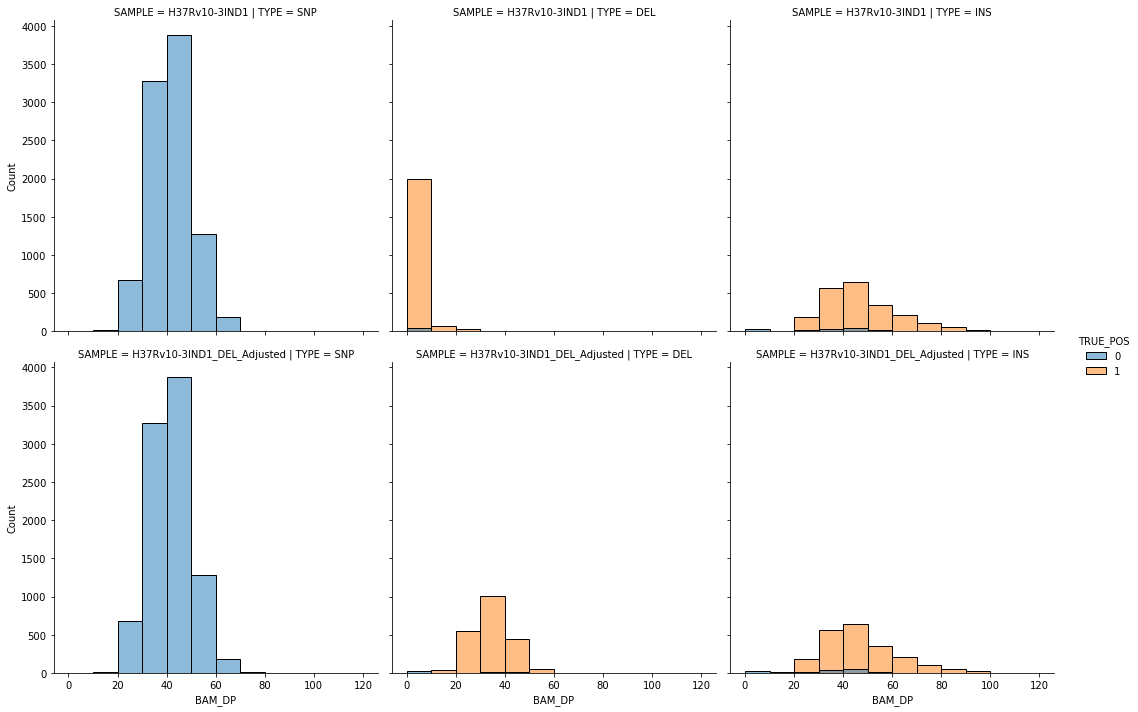

In [41]:
sns.displot(h37rvind1[h37rvind1['TOOL'] == 'lancet'], col='TYPE', row='SAMPLE',
            x='BAM_DP', binwidth=10, hue='TRUE_POS')

#### VarDict

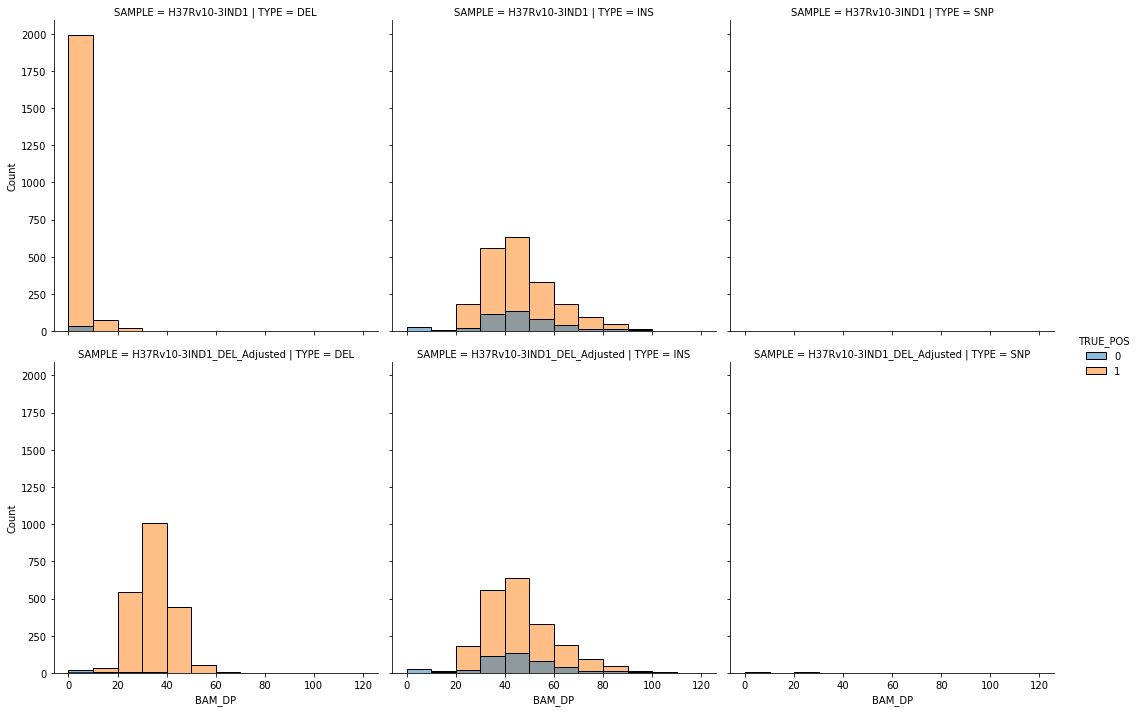

In [40]:
sns.displot(h37rvind1[h37rvind1['TOOL'] == 'vardict'], col='TYPE', row='SAMPLE',
            x='BAM_DP', binwidth=10, hue='TRUE_POS')